# "Decoding the Popularity of Songs: An Analysis of Audio Properties and Genre Preferences"

- track_id: The Spotify ID for the track

- artists: The artists' names who performed the track. If there is more than one artist, they are separated by a ;

- album_name: The album name in which the track appears
track_name: Name of the track

- popularity: The popularity of a track is a value between 0 and 100, with 100 being the most popular. The popularity is calculated by algorithm and is based, in the most part, on the total number of plays the track has had and how recent those plays are. Generally speaking, songs that are being played a lot now will have a higher popularity than songs that were played a lot in the past. Duplicate tracks (e.g. the same track from a single and an album) are rated independently. Artist and album popularity is derived mathematically from track popularity.

- duration_ms: The track length in milliseconds
explicit: Whether or not the track has explicit lyrics (true = yes it does; false = no it does not OR unknown)

- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable

- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale

- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1

- loudness: The overall loudness of a track in decibels (dB)

- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0
speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks

- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic
instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content

- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live

- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)

- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration
time_signature: An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of 3/4, to 7/4.

- track_genre: The genre in which the track belongs

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from omegaconf import OmegaConf, DictConfig, ListConfig
from typing import List, Dict, Union
sns.set_style('darkgrid')
df: pd.DataFrame = pd.read_csv("spotify_dataset.csv", index_col=0)
df.head(4)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.117,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.132,0.143,181.740,3,acoustic


###### Check The Shape , Null , and Duplicated rows 

In [70]:
# Setup Constants
config: Union[DictConfig, ListConfig] = OmegaConf.load("params.yaml")
print(config)

# Num Constants
danceability_str: str = config.constant.danceability_str
energy_str: str = config.constant.energy_str
loudness_str: str = config.constant.loudness_str
speechiness_str: str = config.constant.speechiness_str
acousticness_str: str = config.constant.acousticness_str
instrumentallness_str: str = config.constant.instrumentallness_str
liveness_str: str = config.constant.liveness_str
popularity_str: str = config.constant.popularity_str
valence_str: str = config.constant.valence_str
tempo_str: str = config.constant.tempo_str
duration_str: str = config.constant.duration_str

# Cat Constants
track_id_str: str = config.constant.track_id_str
artists_str: str = config.constant.artists_str
album_name_str: str = config.constant.album_name_str
track_name_str: str = config.constant.track_name_str
explicit_str: str = config.constant.explicit_str
track_genre_str: str = config.constant.track_genre_str


N_FOR_DENSE: int = 10000


{'data': {'datasetPath': 'spotify_dataset.csv'}, 'constant': {'danceability_str': 'danceability', 'energy_str': 'energy', 'loudness_str': 'loudness', 'speechiness_str': 'speechiness', 'acousticness_str': 'acousticness', 'instrumentallness_str': 'instrumentalness', 'liveness_str': 'liveness', 'popularity_str': 'popularity', 'valence_str': 'valence', 'tempo_str': 'tempo', 'duration_str': 'duration_ms', 'track_id_str': 'track_id', 'artists_str': 'artists', 'album_name_str': 'album_name', 'track_name_str': 'track_name', 'explicit_str': 'explicit', 'track_genre_str': 'track_genre'}, 'cmd': {'dt': 'decision_tree', 'rf': 'random_forest', 'knn': 'k_nearest_neighbors', 'ada_bst': 'ada_boost', 'lin_reg': 'linear_regression', 'lgbm': 'light_gbm', 'xgboost': 'xgboost', 'dance': 'danceability', 'energy': 'energy', 'loud': 'loudness', 'speech': 'speechiness', 'acoustic': 'acousticness', 'instrumental': 'instrumentalness', 'live': 'liveness', 'popularity': 'popularity', 'valence': 'valence', 'tempo':

In [4]:
rows, cols = df.shape
duplicateds = df.duplicated().sum()
missingValues = df.isna().sum().values.sum()
print(f"Dataset has {rows} Rows and {cols} Columns")
print(f"Duplicated rows total :  {duplicateds}")
print(f"Missing Values rows total :  {missingValues}")
df = df.drop_duplicates()
print(f"Duplicated Rows Removed, total dataset:  {df.shape[0]}")
df = df.dropna(axis=0)
print(f"Missing Values Removed, total dataset:  {df.shape[0]}")

Dataset has 114000 Rows and 20 Columns
Duplicated rows total :  450
Missing Values rows total :  3
Duplicated Rows Removed, total dataset:  113550
Missing Values Removed, total dataset:  113549


Questions : 
1. How audio properties affect the popularity of songs ? Is not, is not that important
2. What features did affect the popularity the most ? track_genre 
3. How is the models performance on predicting the popularity, how's the Error ?? Model having trouble in predicting the popular songs, tend to overfit into not popular songs . 
4. How The best feature (track_genre) affect the popularity of songs ?  It depends on the listener preferences, some artists tend to follow the trends and other stick with their own genre. Well this can be shown from the popular genre like `pop` ten years ago with `pop` in today's era. 
5. How artists chose their music genre ?   
6. Do Simple recommendation help the genre getting more popular ? 

In [5]:
numDf: pd.DataFrame = df[df.columns[ (df.dtypes == 'int64') | (df.dtypes == 'float64')]]
numCols: List[str] = numDf.columns

catDf: pd.DataFrame = df[df.columns[ (df.dtypes == 'object') | (df.dtypes == 'bool') ]]
catCols: List[str] = catDf.columns

array([[<Axes: title={'center': 'popularity'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>,
        <Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>],
       [<Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>,
        <Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>],
       [<Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>, <Axes: >, <Axes: >]],
      dtype=object)

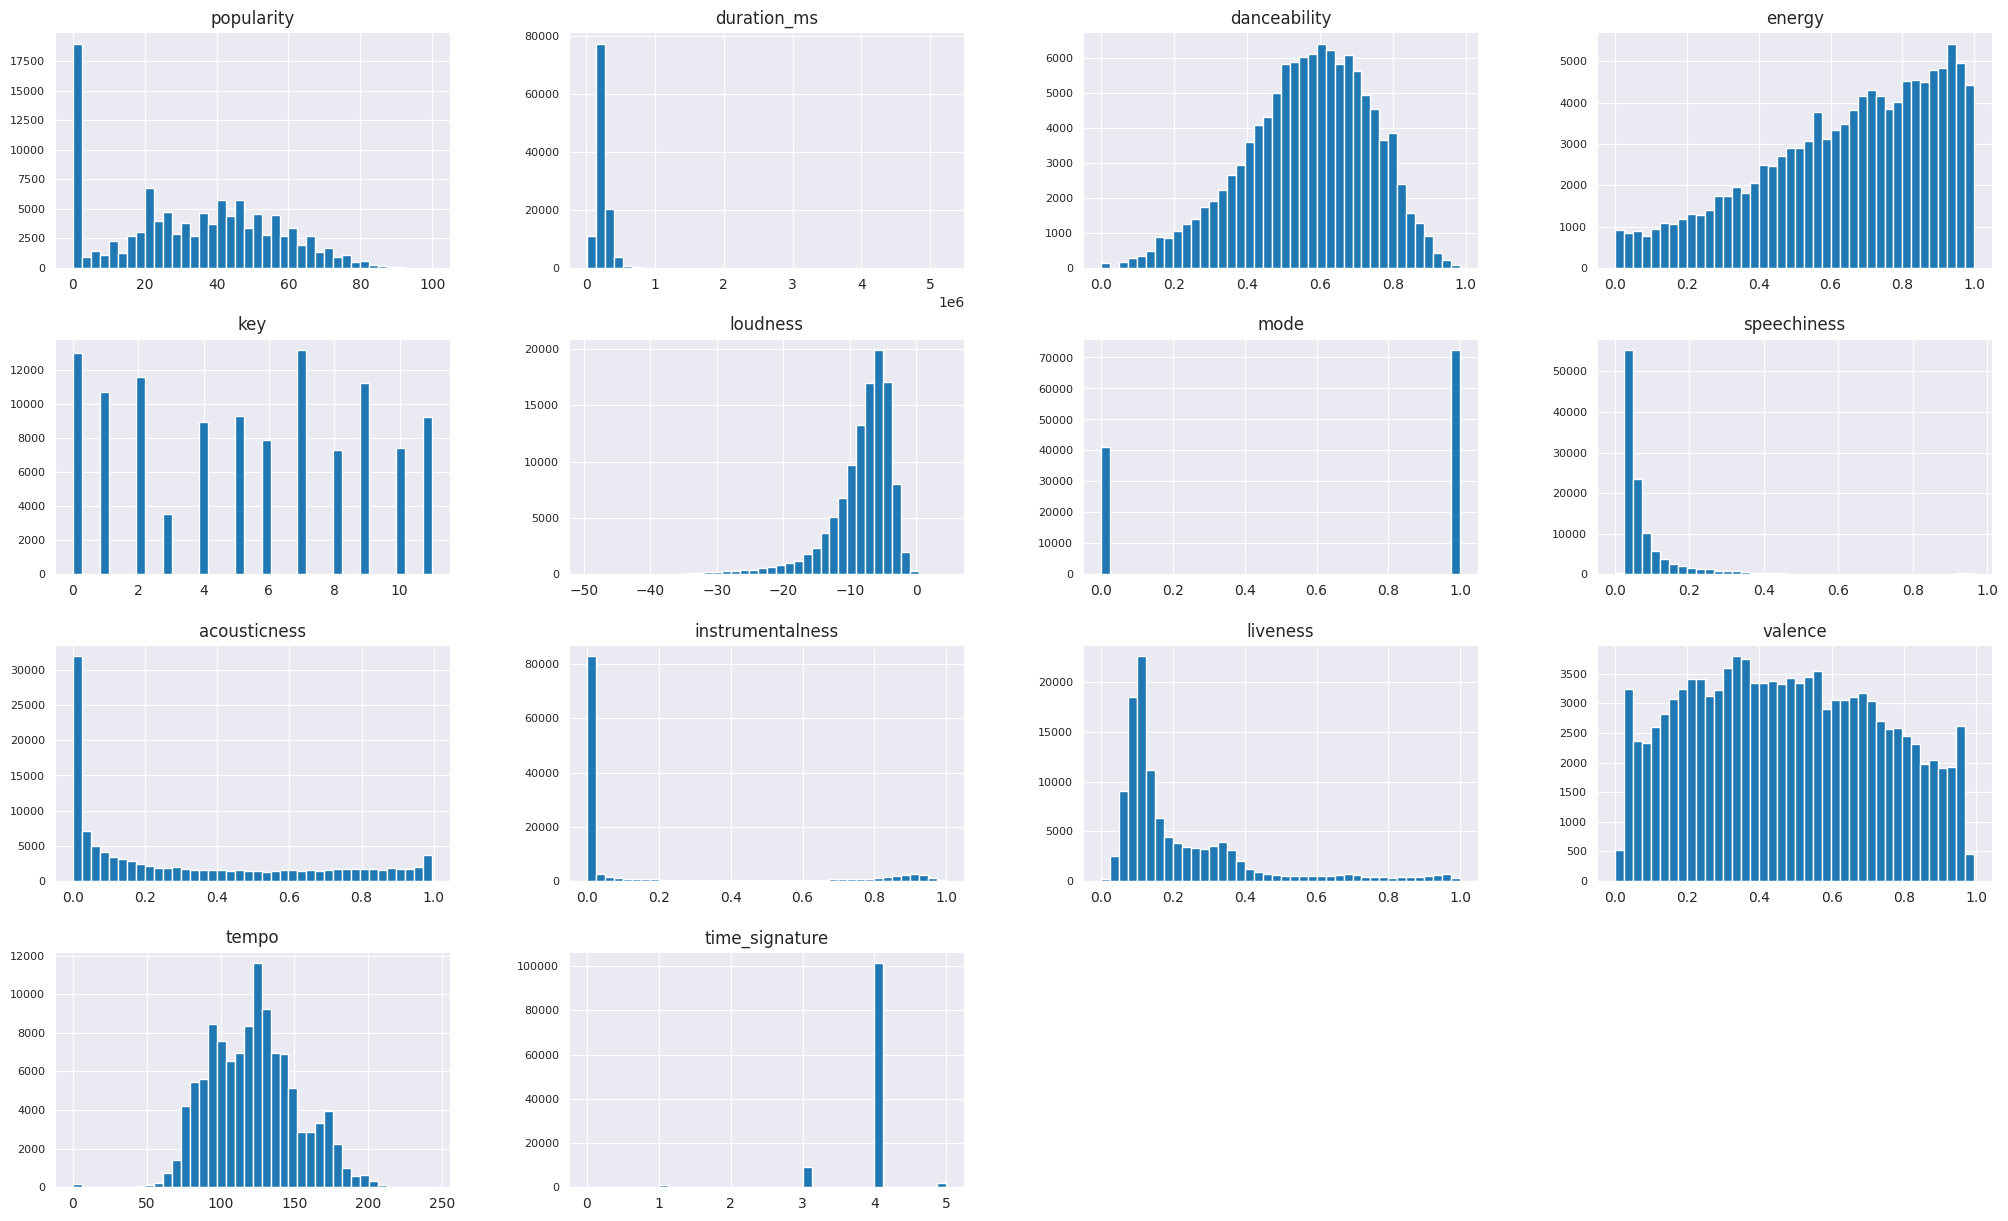

In [6]:
numDf.hist(bins=40, ylabelsize=8, figsize=(25, 15))

- Insight : 
- There is a lot of <strong>unpopular songs</strong>
- Lack of popularity songs indicate how hard it is, because various factor
- Most of the songs seems attract people to dance while listening, although its just the most  
- Most of the songs is not <strong>recorded from live</strong>
- I have no idea why most of the songs are not bring positivity

### Question-1
#### How Audio properties Affect the popularity of songs ? This Question will also be explored on the question 4 too

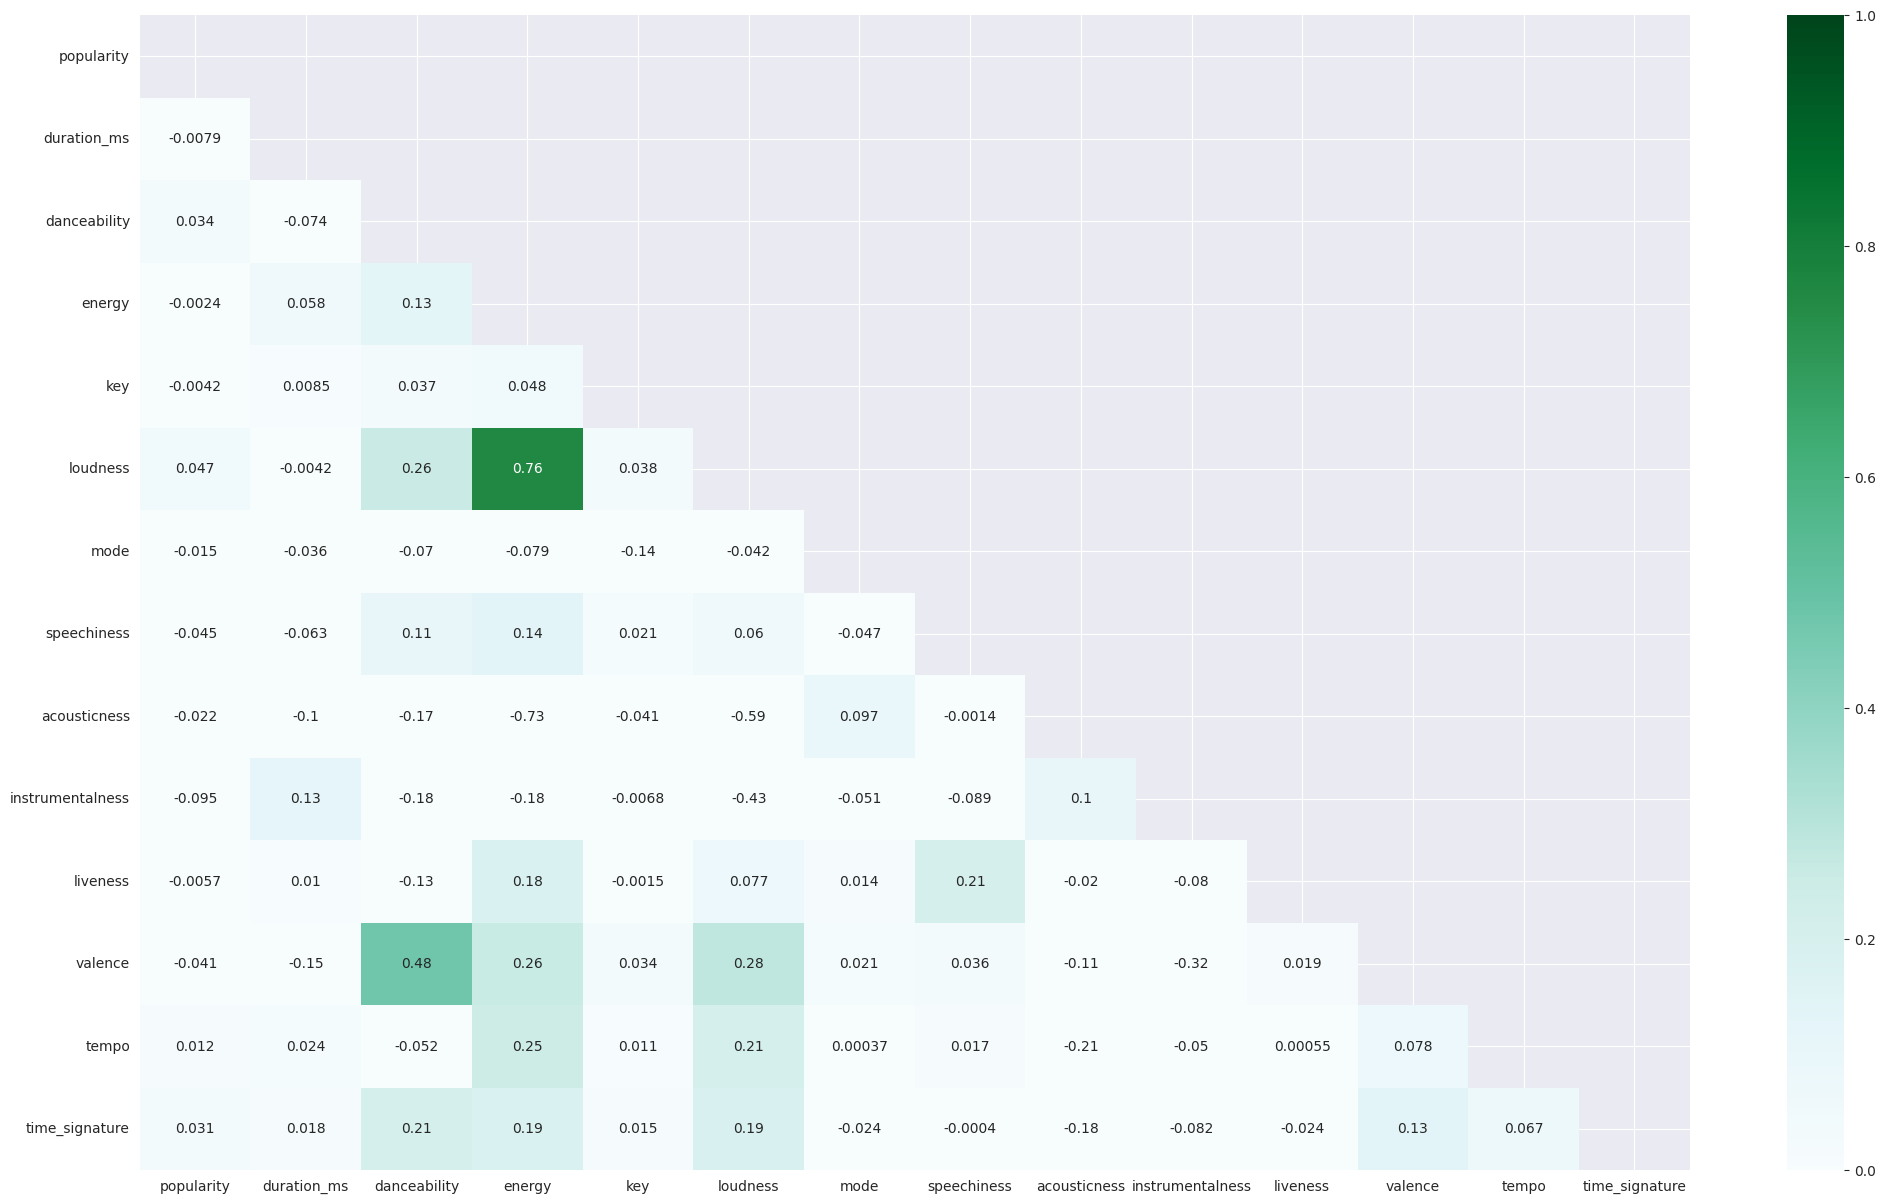

In [7]:
corr: pd.DataFrame = numDf.corr()
mask =  np.zeros_like(corr)
mask[np.triu_indices_from(mask)]  = True
plt.figure(figsize=(25, 15))
sns.heatmap(corr, cmap="BuGn", mask=mask, annot=True, vmin=0, vmax=1)
plt.show()

- `Loudness` - `Energy` has Strong linear correlation , this due the fact that most of the songs that loud should meant to be enjoyed with more energy
- `Valence` - `Danceability` has to be something correlated with the meaning of the songs, this because `valence` or positivity may bring the listener to dance. 
- `Acousticness`- `Loudness` Absolutely negative, this due the fact that there is no way someone make acoustic musing WITH LOUD volume
- `Popularity` only has low linear correlation between all numerical variables, kinda make sense, this due the fact the popularity is based on artists, listener preferences and probably other cat types, therefore it is unlikely that the audio properties affect the popularity of songs . we will see in modelling later to highlight this idea. 


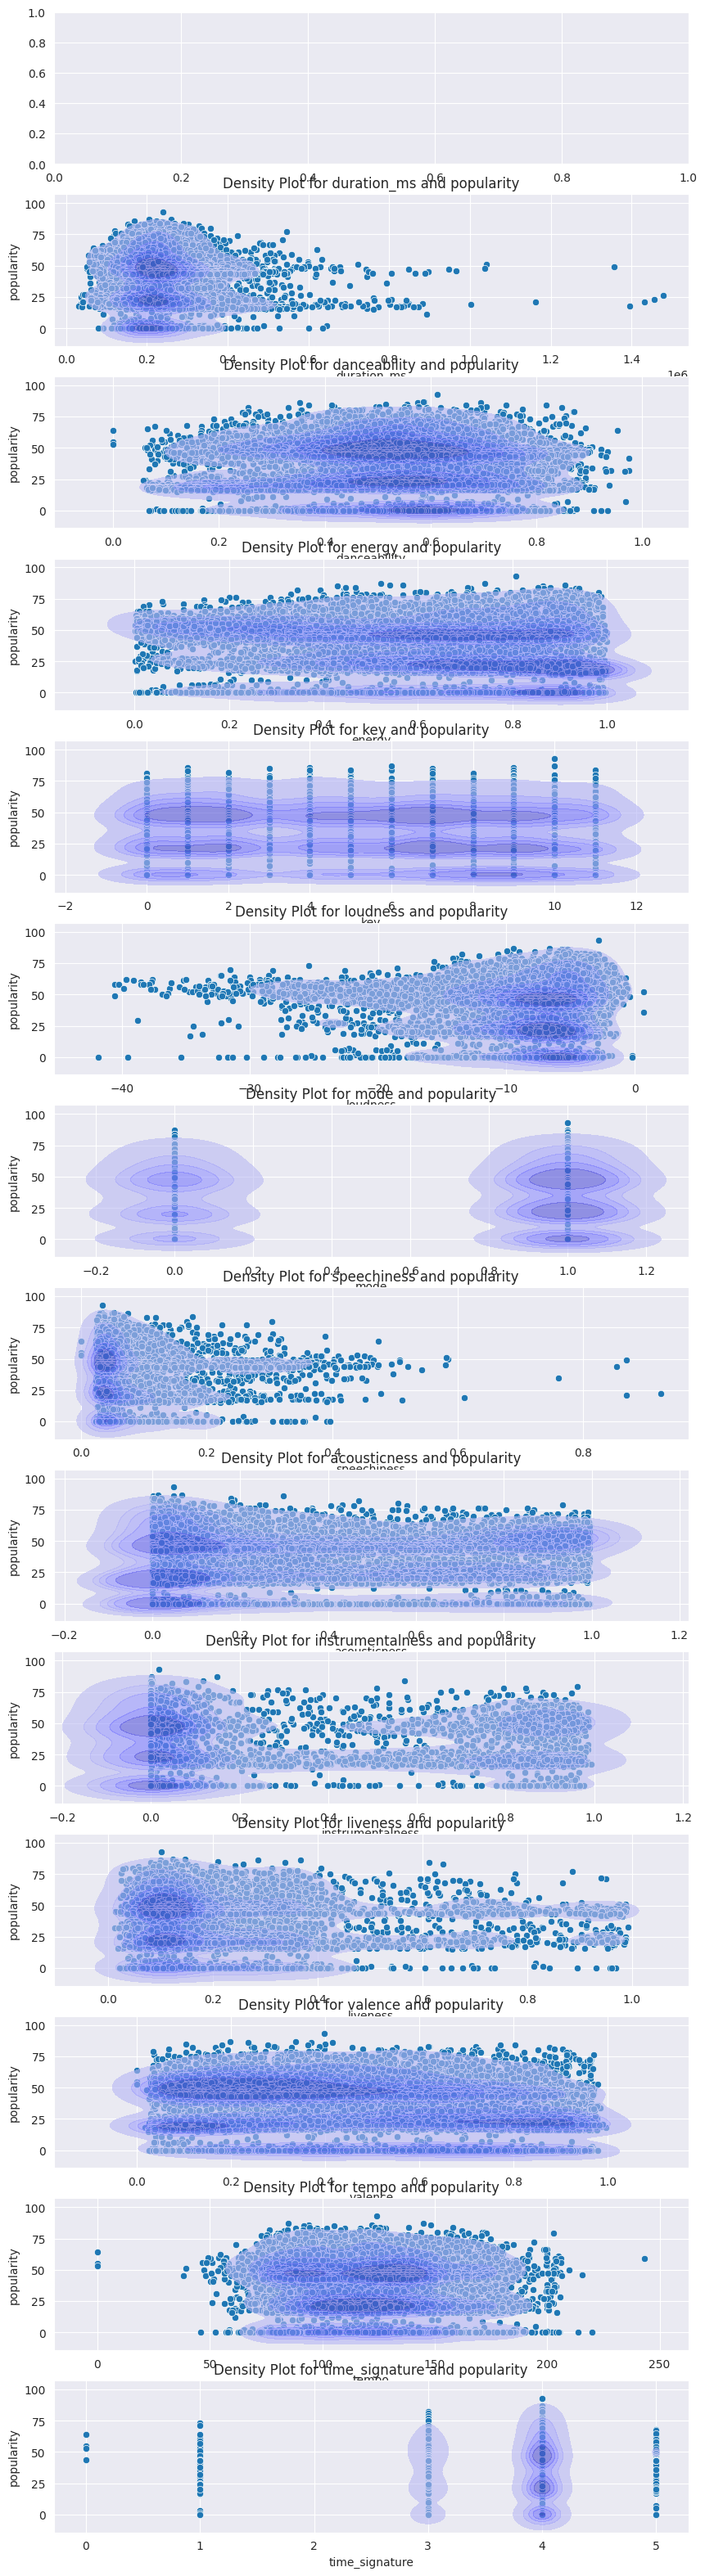

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [75]:
def Bi_PrintScatterPlotDensity(
    col_another_x : str, 
    col_another_y : str,
    ax,
    title_plot_1 : str = None,
):
    title_plot_1 = f"Density Plot for {col_another_x} and {col_another_y}"
    plt.figure(figsize=(12, 8), dpi=100)
    x : np.ndarray = df.loc[:N_FOR_DENSE, col_another_x].values
    y : np.ndarray = df.loc[:N_FOR_DENSE, col_another_y].values
    sns.scatterplot(x=x, y=y, ax=ax)
    sns.kdeplot(x=x, y=y, levels=6, alpha=0.6, fill=True, color="blue",ax=ax)
    ax.set(title=title_plot_1, ylabel=col_another_y,
           xlabel=col_another_x)

fig, axs = plt.subplots(len(numCols), figsize=(10,40))
for indx, i in enumerate(numCols):
    if (i == popularity_str):
        continue
    Bi_PrintScatterPlotDensity(i, popularity_str,ax=axs[indx] )
plt.tight_layout()
plt.show()

In [ ]:
Bi_PrintScatterPlotDensity(danceability_str, loudness_str)

### Please execute Main.py To answer the question number 2

- Findings :
Light_GBM, currently is the best model to predict the `popularity`, its highlight the importance of 2 categorical variables namely `track_genre` and `artists` leaving the numerical behind. This also Supported by <strong>Decision Tree, Random Forest, And XGBoost</strong>, Therefore we will analyze the track_genre in depth



## Answer to Question Number 4 :  How The best feature (track_genre) affect the popularity of songs ?
- What's the most popular track_genre ? How's their audio properties ? What are their purpose 
- Based on 10% most popular songs, how's the track genre And also how's their audio properties ?
- Is Audio Properties helped the music getting popular ? 


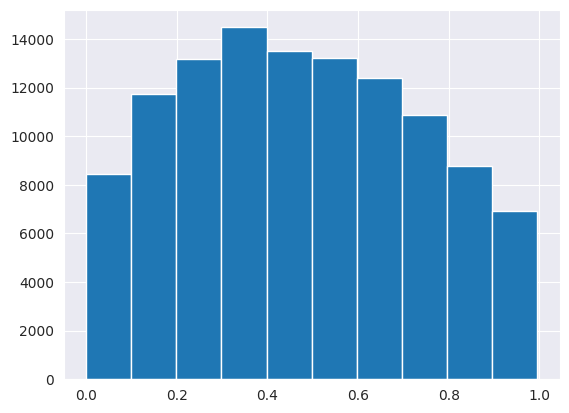

In [8]:
def plotHist(df: pd.DataFrame, column: str):
    plt.hist(df[column])
    plt.show()
plotHist(numDf, valence_str)

In [31]:
def getSplitValueBasedOnDanceability():
    low, moderate, high = 0.0, 0.4 ,0.8
    return low, moderate, high

def getSplitValueBasedOnEnergy():
    low, moderate, high = 0.0, 0.6 , 0.8 
    return low, moderate, high

def getSplitValueBasedOnLoudness():
    low, moderate, high = -25, -10, -5
    return low, moderate, high

def getSplitValueBasedOnSpeechiness():
    low, moderate, high = 0.0, 0.4, 0.6
    return low, moderate, high

def getSplitValueBasedOnAcousticness():
    low, moderate, high = 0.0, 0.6, 0.7
    return low, moderate, high

def getSplitValueBasedOnInstrumentallness():
    low, moderate, high = 0.0, 0.2, 0.8
    return low, moderate, high

def getSplitValueBasedOnLiveness():
    low, moderate, high = 0.0, 0.2, 0.7
    return low, moderate, high


def getSplitValueBasedOnValence():
    low, moderate, high = 0.0, 0.4, 0.7
    return low, moderate, high
    

def splitDfBasedOnNumColumn(df: pd.DataFrame, column: str):
    low, moderate, high = None, None, None
    if (column == danceability_str):
        low, moderate, high = getSplitValueBasedOnDanceability()
    elif (column == energy_str) :
        low, moderate, high = getSplitValueBasedOnEnergy()
    elif (column == loudness_str):
        low, moderate, high = getSplitValueBasedOnLoudness()   
    elif (column == speechiness_str):
        low, moderate, high = getSplitValueBasedOnSpeechiness()
    elif (column == acousticness_str):
        low, moderate, high = getSplitValueBasedOnAcousticness()
    elif (column == instrumentallness_str):
        low, moderate, high = getSplitValueBasedOnInstrumentallness()
    elif (column == liveness_str):
        low, moderate, high = getSplitValueBasedOnLiveness()
    elif (column == valence_str):
        low, moderate, high = getSplitValueBasedOnValence()

    mask_low = (df[column] >= low) & (df[column] < moderate)
    mask_medium = (df[column] >= moderate ) & (df[column] < high)
    mask_high = (df[column] >= high)
    df_low: pd.DataFrame = df[mask_low]
    df_medium: pd.DataFrame = df[mask_medium]
    df_high: pd.DataFrame = df[mask_high]
    return df_low, df_medium, df_high


def plotHistSplit(df: pd.DataFrame, numCols: List[str],
                   observe_str: str, type_view: str = "low"):
    for i in range(len(numCols)):
        if i == observe_str :
            continue
        df_low, df_mod, df_high = splitDfBasedOnNumColumn(df, numCols[i])
        if (type_view == "low"):
            sns.histplot(df_low[observe_str]) 
        elif (type_view == "moderate"):
            sns.histplot(df_mod[observe_str]) 
        elif (type_view == "high"):
            sns.histplot(df_mod[observe_str]) 
        plt.title(numCols[i])
        plt.show()   

def calculateAveragePopularityByGenre(df: pd.DataFrame, n: int, title: str):
    grouped = df.groupby(track_genre_str)[popularity_str].mean().reset_index()
    top_n = grouped.nlargest(n, popularity_str)

    plt.figure(figsize=(10,8))
    sns.barplot(x='popularity', y='track_genre', data=top_n)
    plt.title(title)
    plt.xlabel('Average popularity score')
    plt.ylabel('Genre')
    plt.show()

def sortFilterAndPrintTheirAvgProps(df: pd.DataFrame,
                                    track_genre: str,
                                    limit_n: int = 70,
                                    limit_2: int = 100):
    loc_df: pd.DataFrame =  df[df[track_genre_str] == track_genre].sort_values(popularity_str, ascending=False)
    loc_df: pd.DataFrame = loc_df[(loc_df[popularity_str] >= limit_n) & (loc_df[popularity_str] <= limit_2)]
    print(f"Avg Danceability {loc_df[danceability_str].mean()}" )
    print(f"Avg Popularity {loc_df[popularity_str].mean()}" )
    print(f"Avg Instrumentalness {loc_df[instrumentallness_str].mean()}" )
    print(f"Avg Acousticness {loc_df[acousticness_str].mean()}" )
    print(f"Avg Speechiness {loc_df[speechiness_str].mean()}" )
    print(f"Avg Valence {loc_df[valence_str].mean()}" )
    print(f"Avg Energy {loc_df[energy_str].mean()}" )
    print(f"Avg Liveness {loc_df[liveness_str].mean()}" )
    return loc_df

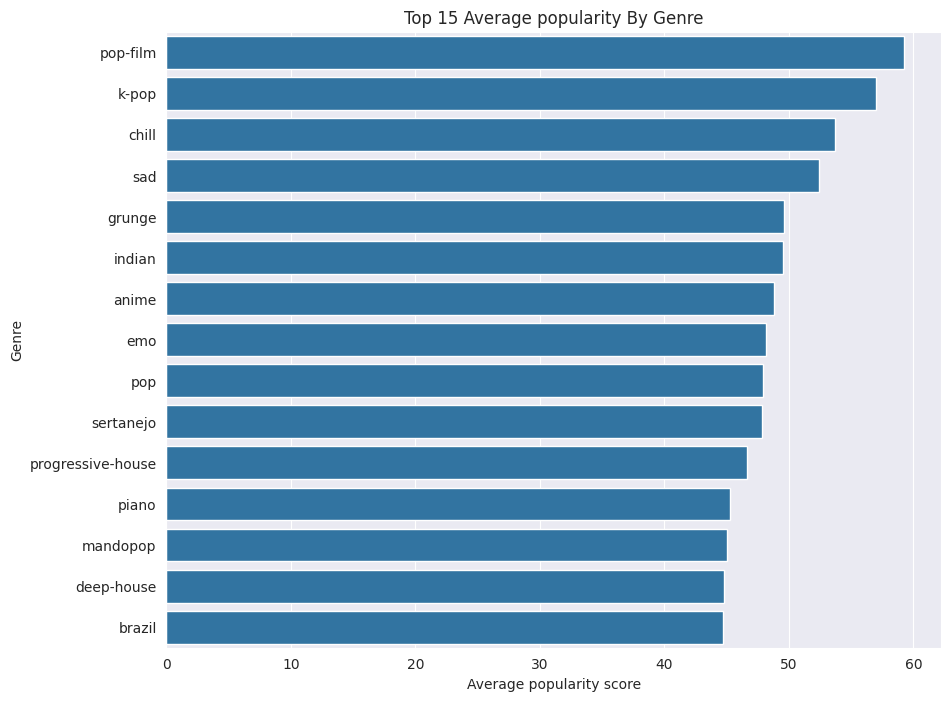

In [29]:
calculateAveragePopularityByGenre(df, 15,  "Top 15 Average popularity By Genre")

In [32]:
sortFilterAndPrintTheirAvgProps(df, "pop-film")

Avg Danceability 0.6030746268656716
Avg Popularity 72.38805970149254
Avg Instrumentalness 0.002188860447761194
Avg Acousticness 0.48485537313432836
Avg Speechiness 0.06707313432835822
Avg Valence 0.5271343283582091
Avg Energy 0.5845074626865672
Avg Liveness 0.14293880597014927


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
80037,6TQS7URegxmcb8tTNpoXzi,Dhanush;Anirudh Ravichander,"Megham Karukatha (From ""Thiruchitrambalam"")","Megham Karukatha (From ""Thiruchitrambalam"")",80,290400,False,0.429,0.614,4,-6.573,0,0.0709,0.513,0.000316,0.0922,0.743,149.966,3,pop-film
80016,1Nr46gjiP50uPsz30gYhAd,Santhosh Narayanan;Anirudh Ravichander,"Thenmozhi (From ""Thiruchitrambalam"")","Thenmozhi (From ""Thiruchitrambalam"")",79,173225,False,0.764,0.532,9,-5.979,0,0.0491,0.598,0.000000,0.2600,0.859,123.950,4,pop-film
80047,3i7qScF9Oyp31O9bAutJez,A.R. Rahman;Madhushree,Vendhu Thanindhathu Kaadu (Original Motion Pic...,Mallipoo,79,245365,False,0.715,0.654,2,-7.266,1,0.3360,0.196,0.000117,0.0667,0.762,175.589,3,pop-film
80043,5urYiIXu1ZhfMAOsp7WDTc,Yasser Desai;Neha Kakkar;Rajat Nagpal,"Dil Ko Karaar Aaya (From ""Sukoon"")","Dil Ko Karaar Aaya (From ""Sukoon"")",77,231486,False,0.550,0.448,11,-9.117,1,0.0366,0.777,0.000459,0.1110,0.388,147.986,4,pop-film
80036,72zHuDxFQTjbL51qJQSA7j,Jasleen Royal;B Praak;Romy;Anvita Dutt,"Ranjha (From ""Shershaah"")","Ranjha (From ""Shershaah"")",77,228855,False,0.603,0.573,1,-5.843,1,0.0502,0.478,0.000000,0.0971,0.236,82.941,4,pop-film
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80038,0bmp0lE3ArELHqda9PBMVG,Amit Trivedi;Kavita Seth;Amitabh Bhattacharya,I Love You...Forever,"Iktara (From ""Wake Up Sid"")",70,253773,False,0.616,0.525,7,-7.065,1,0.0258,0.401,0.000484,0.3090,0.427,79.976,4,pop-film
80033,1O5mTSQa0sCce9ghhDqIZl,A.R. Rahman;Javed Ali,Jodhaa Akbar (Original Motion Picture Soundtrack),Jashn-E-Bahaaraa,70,315173,False,0.700,0.343,2,-10.474,1,0.0308,0.767,0.000000,0.0789,0.488,137.864,4,pop-film
80058,4Tkb7zsDmsawB7S5TpKQV1,Atif Aslam;Shiraz Uppal,Pehli Dafa,Pehli Dafa,70,298771,False,0.679,0.537,4,-7.843,1,0.0322,0.844,0.000003,0.1080,0.481,111.979,4,pop-film
80030,1hQia6rxgfM1ly2hE3StWp,Vishal-Shekhar;Salim Merchant;Neeti Mohan;Shek...,Student of the Year (Original Motion Picture S...,Ishq Wala Love,70,257972,False,0.711,0.295,0,-12.377,0,0.0334,0.534,0.000045,0.0782,0.694,135.041,4,pop-film


Only 67 Observations, and seems this top 1 popular is from india, Based on what we listening, this could / probably used in movies as dancing support song. Based on its popularity, this songs give the listener more probability to `danceability` and it is supported by the `energy` avg. Although pay attention at `instrumentallness` and `speechiness` in which they are both low supported this arguments. Therefore seems the popular songs among this genre is due the fact that someone would be dancing in the movie  while listening to this song. The listener might also probably start to dance too because of the songs and also the actors.

In [33]:
sortFilterAndPrintTheirAvgProps(df, "k-pop")

Avg Danceability 0.6815555555555556
Avg Popularity 74.34222222222222
Avg Instrumentalness 0.008283063555555555
Avg Acousticness 0.12417304444444445
Avg Speechiness 0.09812977777777777
Avg Valence 0.5664133333333332
Avg Energy 0.746248888888889
Avg Liveness 0.17356488888888894


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
65053,2gYj9lubBorOPIVWsTXugG,IVE,After LIKE,After LIKE,88,176973,False,0.680,0.922,0,-1.215,1,0.1210,0.10300,0.00000,0.0877,0.799,125.014,4,k-pop
65019,6tCd8bPvYnceDG7W9M1RMk,BLACKPINK,BORN PINK,Shut Down,87,175889,False,0.813,0.657,0,-6.447,1,0.0372,0.00269,0.00000,0.1830,0.651,110.053,3,k-pop
65056,0RDqNCRBGrSegk16Avfzuq,TWICE,BETWEEN 1&2,Talk that Talk,86,177466,False,0.772,0.907,3,-2.438,0,0.1240,0.13600,0.00000,0.3340,0.783,119.973,4,k-pop
65150,1rDQ4oMwGJI7B4tovsBOxc,Jack Harlow,First Class,First Class,86,173947,True,0.905,0.563,8,-6.135,1,0.1020,0.02540,0.00001,0.1130,0.324,106.998,4,k-pop
65031,10SRMwb9EuVS1K9rYsBfHQ,BTS,Proof,Yet To Come,85,193593,False,0.559,0.885,1,-4.515,1,0.1890,0.04320,0.00000,0.3330,0.683,172.029,4,k-pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65817,2mgzUVvDpb1zMSB4glLQ6T,aespa,Life's Too Short,Life's Too Short (English Version),70,178133,False,0.472,0.800,0,-3.681,1,0.2650,0.28900,0.00000,0.1490,0.548,72.203,4,k-pop
65331,25MHcbjvSdcfTiFgbKJiZF,BTS,MAP OF THE SOUL : 7,Inner Child,70,233265,False,0.589,0.696,11,-7.981,1,0.0725,0.01700,0.00000,0.0808,0.330,134.953,4,k-pop
65217,7lrqvdivAYRGEiO8JFP31G,BTS;Halsey,MAP OF THE SOUL : 7,Boy With Luv (Feat. Halsey),70,229773,False,0.645,0.862,11,-4.761,0,0.0845,0.09330,0.00000,0.1930,0.803,119.947,4,k-pop
65205,1LNlfvPQmB0cqYJQQskZ8x,Jay Park;Ugly Duck,Worldwide,MOMMAE,70,204991,True,0.694,0.691,0,-4.791,1,0.2870,0.22600,0.00000,0.1040,0.678,93.910,4,k-pop


There are 225 observations which indicate that K-Pop  more popular among the spotify listener, based on our observations, the popular songs tend to have high `danceability`, as we are all know most of the K-Pop songs video clip was made with dancing too when the singer sing the song. Moreover, the `energy` avg values support this argument. And it also make sense that if the song was danceable it also probably low on `instrumentallness` & `speechiness` because most of the songs give the listener the higher chance to dance

In [34]:
sortFilterAndPrintTheirAvgProps(df, "chill")

Avg Danceability 0.68
Avg Popularity 73.3913043478261
Avg Instrumentalness 0.09688178152173911
Avg Acousticness 0.4850134782608695
Avg Speechiness 0.1432586956521739
Avg Valence 0.40796521739130437
Avg Energy 0.448836956521739
Avg Liveness 0.1549913043478261


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
15013,3JvKfv6T31zO0ini8iNItO,Tom Odell,Long Way Down (Deluxe),Another Love,93,244360,True,0.445,0.5370,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.1310,122.769,4,chill
15007,0QzuaeCEEOV40Pn7IvKEny,dhruv,rapunzel,double take,83,171743,False,0.656,0.4360,8,-11.141,1,0.0744,0.84500,0.000000,0.2210,0.1960,109.239,4,chill
15054,7ArVzlFsFsQXNseVXmdOyk,Denise Julia,NVMD,NVMD,79,181224,True,0.758,0.6740,6,-4.533,1,0.1080,0.09030,0.000000,0.0902,0.4240,97.977,4,chill
15058,7D7e6hm2LiNd6nLuJF6K9Q,80purppp,Hex,Hex,79,122221,False,0.845,0.3980,5,-15.781,1,0.2680,0.87200,0.007130,0.1590,0.4820,109.996,4,chill
15121,5wwPdWKbDEiybmWkZqsGGn,JBee;Mixtape Madness,Next Up - S4-E2,"Next Up - S4-E2, Pt. 1",77,120839,True,0.540,0.5850,8,-7.563,0,0.3090,0.19800,0.000000,0.1470,0.5160,100.289,3,chill
15016,55XrFge2dEZwYzNl128DwN,itssvd;Shiloh Dynasty,Missing,Losing Interest,76,120546,False,0.753,0.3550,8,-13.295,0,0.0898,0.48000,0.870000,0.1220,0.5060,111.863,4,chill
15050,7es56D0QedGMsK39wl2yFX,ASTN,Happier Than Ever,Happier Than Ever,76,109325,True,0.667,0.4570,6,-6.885,0,0.4390,0.34100,0.000000,0.1140,0.2660,97.604,4,chill
15017,2MJz8BxxMsERULatmBikDH,Pink Sweat$,PINK PLANET,At My Worst,76,170344,False,0.813,0.4150,0,-5.926,1,0.0349,0.77700,0.000000,0.1310,0.6670,91.921,4,chill
15060,1Fhb9iJPufNMZSwupsXiRe,keshi,beside you,beside you,75,166023,False,0.711,0.7470,0,-6.335,1,0.0523,0.45900,0.000000,0.0957,0.8520,136.000,4,chill
15138,7z5G2LOdV8okZn4yWg3q5g,A1 x J1;Tion Wayne,Night Away (Dance) (feat. Tion Wayne),Night Away (Dance) (feat. Tion Wayne),75,175774,True,0.706,0.5520,5,-9.479,0,0.0833,0.23500,0.000000,0.1440,0.8350,142.037,4,chill


Based on our observations, the popular songs tend to have high `danceability`, because this is `chill` genre we observed that this `danceability` variable should be smaller, but after we listen to the songs, we found that the variable `danceability` was more like people just nodding they head or playing with their hand, and that also indicate higher `danceability` on the otherhand, `energy` variable will determine how much the listener gave their energy, due this is `chill` genre, this also make sense.  Notice that `valence` is also near near negative thoughts, and yep most of the songs lyrics contains the negative lyrics. Such as i wanna figt, fucking rude, i'll lose, and the others. On the other hand some songs also promotes the positivity, but again the high `valence` is low compared with the low.

In [35]:
sortFilterAndPrintTheirAvgProps(df, "sad")

Avg Danceability 0.7101724137931037
Avg Popularity 73.41379310344827
Avg Instrumentalness 0.09211974793103447
Avg Acousticness 0.557851724137931
Avg Speechiness 0.1622827586206896
Avg Valence 0.4044310344827587
Avg Energy 0.4020172413793103
Avg Liveness 0.18216551724137936


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
94000,7eJMfftS33KTjuF7lTsMCx,Powfu;beabadoobee,death bed (coffee for your head),death bed (coffee for your head),83,173333,False,0.726,0.4310,8,-8.765,0,0.1350,0.7310,0.000000,0.6960,0.3480,144.026,4,sad
94002,2kx5sQgmjYug0GiDh1a4sU,Cheriimoya;Sierra Kidd,"Living Life, In The Night","Living Life, In The Night",83,122517,True,0.624,0.4990,0,-9.962,0,0.0495,0.8200,0.000000,0.1200,0.2980,143.249,4,sad
94001,4ZLzoOkj0MPWrTLvooIuaa,Kina;Snøw,Get You The Moon (feat. Snøw),Get You The Moon (feat. Snøw),80,179080,False,0.498,0.2350,1,-16.541,0,0.1880,0.7200,0.000000,0.1440,0.0895,118.917,4,sad
94003,7D7e6hm2LiNd6nLuJF6K9Q,80purppp,Hex,Hex,79,122221,False,0.845,0.3980,5,-15.781,1,0.2680,0.8720,0.007130,0.1590,0.4820,109.996,4,sad
94021,58wyJLv6yH1La9NIZPl3ne,Kina;Adriana Proenza,Can We Kiss Forever?,Can We Kiss Forever?,77,187931,False,0.522,0.1280,4,-18.717,1,0.0357,0.8940,0.026000,0.0941,0.1240,109.986,4,sad
94004,27XMmSWSOXJ7eVb40tH93T,347aidan,TROUBLED MEMORIES!,MEMORIES!,76,137806,False,0.835,0.3810,9,-6.121,1,0.3420,0.7570,0.000005,0.1210,0.3100,154.973,4,sad
94016,55XrFge2dEZwYzNl128DwN,itssvd;Shiloh Dynasty,Missing,Losing Interest,76,120546,False,0.753,0.3550,8,-13.295,0,0.0898,0.4800,0.870000,0.1220,0.5060,111.863,4,sad
94029,3HsFSrIsbO54TFDfG66pZm,iamjakehill,By the Sword,By the Sword,75,125812,True,0.685,0.7600,2,-7.813,1,0.0512,0.0199,0.151000,0.0866,0.7810,160.035,4,sad
94006,6Pgmqg15yVexuOgtzuxwoX,347aidan,Dancing in My Room,Dancing in My Room,74,180138,True,0.980,0.4130,8,-11.052,0,0.1010,0.6710,0.000079,0.1700,0.7640,119.993,4,sad
94041,39LJCSHy7nB1akjmhMQ7Y7,Josh A,Fearless,Pain,74,188041,True,0.789,0.5090,6,-8.629,0,0.2770,0.5250,0.000008,0.0936,0.6100,75.009,4,sad


Based on our observations, the popular songs tend to have high `danceability`, because this is `sad` genre, this also have similarity with previous genre. But notice that the acousticness tend to be higher, this indicate that `sad` genre song promotes the lyrics and provide the listener to enjoy the lyrics indicated by higher `acousticness`

In [36]:
sortFilterAndPrintTheirAvgProps(df, "grunge")

Avg Danceability 0.4702043010752688
Avg Popularity 73.73118279569893
Avg Instrumentalness 0.030246006344086016
Avg Acousticness 0.05499356021505376
Avg Speechiness 0.05012258064516129
Avg Valence 0.4474182795698925
Avg Energy 0.7970967741935483
Avg Liveness 0.19483225806451607


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
44001,60a0Rd6pjrkxjPbaKzXjfq,Linkin Park,Hybrid Theory (Bonus Edition),In the End,85,216880,False,0.556,0.864,3,-5.870,0,0.0584,0.009580,0.000000,0.2090,0.4000,105.143,4,grunge
44074,5UWwZ5lm5PKu6eKsHAGxOk,Foo Fighters,The Colour And The Shape,Everlong,84,250546,False,0.413,0.881,11,-5.541,0,0.0367,0.000060,0.000308,0.0805,0.3640,158.066,4,grunge
44013,4CeeEOM32jQcH3eN9Q2dGj,Nirvana,Nevermind (Remastered),Smells Like Teen Spirit,83,301920,False,0.502,0.912,1,-4.556,1,0.0564,0.000025,0.000173,0.1060,0.7200,116.761,4,grunge
44002,2nLtzopw4rPReszdYBJU6h,Linkin Park,Meteora,Numb,83,185586,False,0.496,0.863,9,-4.153,1,0.0381,0.004600,0.000000,0.6390,0.2430,110.018,4,grunge
44010,77loZpT5Y5PRP1S451P9Yz,Hoobastank,The Reason (15th Anniversary Deluxe),The Reason,81,232800,False,0.472,0.671,4,-4.649,1,0.0290,0.012900,0.000000,0.1590,0.0681,82.952,4,grunge
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44286,3pxCXv0NACYfYnLjFcQW5D,Saving Abel,Saving Abel,Addicted,70,222826,True,0.512,0.864,7,-4.146,1,0.0338,0.000821,0.000000,0.0982,0.5270,138.018,4,grunge
44514,1gyee1JuFFiP476LQpRMYU,Chevelle,Wonder What's Next (Expanded Edition),The Red,70,238400,False,0.509,0.843,1,-3.318,0,0.0488,0.000671,0.000803,0.3480,0.3320,140.055,3,grunge
44535,4YFcGTdgmEuw8xTO4XrxbB,The Smashing Pumpkins,Mellon Collie And The Infinite Sadness (Deluxe...,Zero - Remastered 2012,70,160173,True,0.438,0.728,8,-7.105,1,0.0458,0.000035,0.570000,0.0509,0.7010,128.040,4,grunge
44073,5rAxhWcgFng3s570sGO2F8,Linkin Park,Hybrid Theory (Bonus Edition),A Place for My Head,70,184640,False,0.603,0.908,11,-5.254,1,0.1840,0.014400,0.000000,0.6710,0.4570,133.063,4,grunge


Thi is the songs from the early 2010 below, notice that they are both low on `instrumentallness`, `acousticness`, and `speechiness` but higher `energy` with most of the songs contains negative lyrics, `valence` below 0.50 indicate that these songs were to meant listeners which they wanted to listen the music with the `sad` and `chill` genres but also maintain high energy, maybe because they high ?. 

#### Conclusion

- Now we try to understand the explict ratio, this is important to take a look at which genre does have most of the explicit words then we're able to connnect it into the previous genre

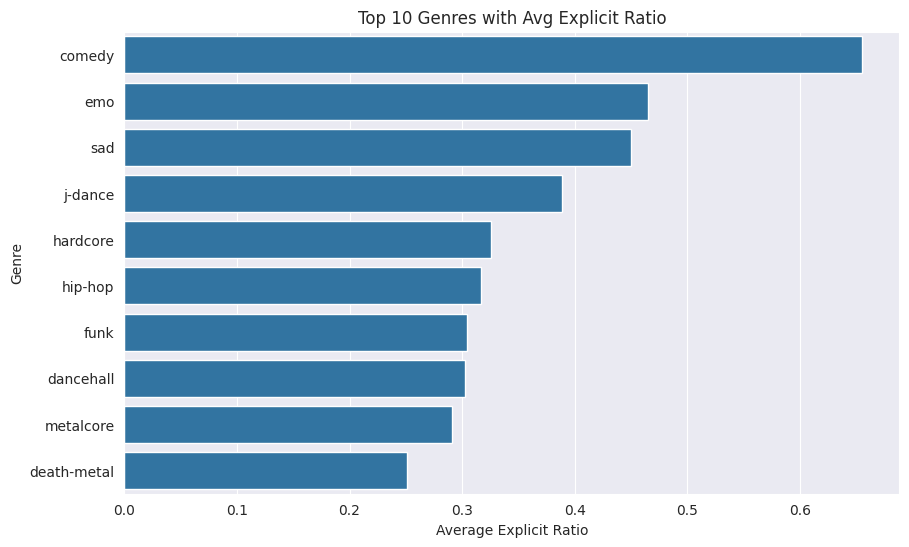

In [44]:
def showExplictByGenre(df: pd.DataFrame, n: int = 10):
    explicit_by_genre = df.groupby(track_genre_str)[explicit_str].mean().reset_index()
    explicit_by_genre = explicit_by_genre.nlargest(n, explicit_str)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=explicit_str, y=track_genre_str, data=explicit_by_genre)
    plt.title(f"Top {n} Genres with Avg Explicit Ratio")
    plt.xlabel("Average Explicit Ratio")
    plt.ylabel("Genre")
    plt.show()
showExplictByGenre(df)

In [47]:
sortFilterAndPrintTheirAvgProps(df, "comedy", 50, 90)

Avg Danceability 0.7356774193548388
Avg Popularity 58.0
Avg Instrumentalness 5.4764516129032253e-05
Avg Acousticness 0.30993445161290323
Avg Speechiness 0.24355161290322583
Avg Valence 0.5814129032258064
Avg Energy 0.6053225806451612
Avg Liveness 0.2388322580645161


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
18000,2hhFpD32iXUd4GaCu6T4wn,Jon Lajoie,You Want Some of This?,Everyday Normal Guy 2,75,195693,True,0.823,0.731,3,-4.273,1,0.3070,0.420000,0.000000,0.3060,0.8760,90.302,4,comedy
18015,1ACZpHI5vZ5Ea4xGlkdGWM,Afroman,The Good Times,Crazy Rap (Colt 45 & 2 Zig Zags),74,328666,True,0.927,0.367,9,-7.797,1,0.3820,0.325000,0.000000,0.1320,0.5760,99.053,4,comedy
18003,0rRboI6IRuGx56Dq3UdYY4,Afroman,The Good Times,Because I Got High,69,197760,True,0.802,0.341,7,-8.560,1,0.4880,0.169000,0.000000,0.0783,0.8490,166.010,4,comedy
18005,7MkysLvt3L8UFji2PceoFU,Lil Dicky;Brendon Urie,Professional Rapper,Molly (feat. Brendon Urie of Panic at the Disco),66,244339,True,0.829,0.514,7,-6.694,1,0.0370,0.203000,0.000157,0.1150,0.3970,114.955,4,comedy
18006,1TkWsnheqK0gBtvh07BtNX,Lil Dicky;Fetty Wap;Rich Homie Quan,Professional Rapper,$ave Dat Money (feat. Fetty Wap & Rich Homie Q...,64,290835,True,0.858,0.697,2,-5.361,1,0.2300,0.114000,0.000000,0.2240,0.3640,98.013,4,comedy
18017,0Dfctnkk9xIikDKJ06uwzo,Pink Guy,Pink Season,She's So Nice,64,163493,True,0.828,0.577,6,-7.656,0,0.1580,0.599000,0.000000,0.0814,0.5870,86.339,4,comedy
18004,5PEleSkK4p4E1sx3x7cOLt,The Lonely Island;Akon,Turtleneck & Chain (Explicit Version),I Just Had Sex,63,166560,True,0.615,0.811,6,-4.316,1,0.1440,0.018800,0.000000,0.1960,0.8080,167.995,4,comedy
18009,5TlAXiBCBwiQnIZUAA4Jkg,Lil Dicky;Snoop Dogg,Professional Rapper,Professional Rapper (feat. Snoop Dogg),62,353959,True,0.684,0.621,11,-8.442,0,0.3620,0.432000,0.000000,0.6070,0.5370,128.882,3,comedy
18251,7lFgli7y2vo7sjgynHZzBP,Tenacious D,The Pick Of Destiny,Kickapoo,60,254346,True,0.501,0.796,0,-4.599,1,0.1040,0.107000,0.000974,0.5390,0.5820,130.719,4,comedy
18063,4DEcdqqKokU7UAE4wCGQEy,Monty Python,Monty Python Sings,Always Look On The Bright Side Of Life,60,215333,True,0.669,0.535,2,-12.360,1,0.0972,0.432000,0.000000,0.2080,0.7390,120.071,4,comedy


THis is true, for comedy songs, the words is much importants, so it make sense that the `acousticness` & `speechiness` more higher compared the previous genre. The explict words is somehow make sense for comedy songs, because it tends to empashize the comedic part within the song itself. Some songs also used slang / sarcasm languages. But again this genre does is not that popular, the chose of explicit words within songs could be from various factors, especially the artists.

In [48]:
sortFilterAndPrintTheirAvgProps(df, "emo", 50, 90)

Avg Danceability 0.6259812734082397
Avg Popularity 60.72659176029963
Avg Instrumentalness 0.03767582001872659
Avg Acousticness 0.23063283220973782
Avg Speechiness 0.11033726591760301
Avg Valence 0.4154795880149813
Avg Energy 0.6170559925093633
Avg Liveness 0.16938913857677904


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
33007,5TXDeTFVRVY7Cvt0Dw4vWW,XXXTENTACION,17,Revenge,87,120026,True,0.746,0.251,11,-16.169,0,0.2590,0.7820,0.002030,0.1060,0.180,139.999,4,emo
33012,2ZRo7axmMPeSVUvDbGkJah,XXXTENTACION,?,Hope,86,110886,True,0.592,0.457,9,-6.081,0,0.0603,0.6610,0.000331,0.1460,0.225,146.040,4,emo
33009,3GVkPk8mqxz0itaAriG1L7,XXXTENTACION,17,Everybody Dies In Their Nightmares,85,95466,True,0.734,0.570,7,-7.066,0,0.1330,0.8470,0.000021,0.1120,0.689,129.953,4,emo
33005,7m9OqQk4RVRkw9JJdeAw96,XXXTENTACION,17,Jocelyn Flores,84,119133,True,0.872,0.391,0,-9.144,0,0.2420,0.4690,0.000004,0.2970,0.437,134.021,4,emo
33002,7AQim7LbvFVZJE3O8TYgf2,XXXTENTACION;Trippie Redd,17,Fuck Love (feat. Trippie Redd),83,146520,True,0.797,0.533,0,-9.740,0,0.0412,0.0172,0.000152,0.1030,0.329,131.036,4,emo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33555,6rZ17m2X1UIjsVn1zw4Ctm,FACE,SLIME,ПОДРУГА ПОДРУГ,50,164921,True,0.843,0.615,1,-5.696,1,0.2430,0.0891,0.000055,0.1400,0.616,153.075,4,emo
33514,5n9O3DqswW3Vm5b3Z07zcB,XXXTENTACION;Ky-Mani Marley;Stefflon Don;Vybz ...,Bad Vibes Forever,Royalty,50,203519,True,0.907,0.571,8,-5.345,0,0.2270,0.0120,0.018300,0.0974,0.612,124.973,4,emo
33778,30SeRoO5sxqYCvrznYhjVU,Kam Michael;Rey-Infinite,If I Lose You (feat. Rey-Infinite),If I Lose You - feat. Rey-Infinite,50,102407,True,0.480,0.517,11,-10.540,0,0.3830,0.4720,0.000000,0.3650,0.344,181.847,4,emo
33149,3Xx8DDgvddsYPnxTH2LXsd,Fresno,Redenção,Desde Quando Você Se Foi,50,216226,False,0.575,0.902,6,-3.092,1,0.0321,0.0770,0.000000,0.3590,0.601,130.024,4,emo


`Emo` somehow related to `sad` genre, its because the lyrics and the higher `explicit` ratio. But lower `acousticness` indicates that these songs we're not using acoustic mostly difference with `sad`. But also the purpose is still the same, because based on the songs we've listened, the artists emphasize the lyrics meaning it just a different perspective compared with the `sad` genres

Based on these findings, we understand that from the popularity perspective these explicit ratio depends on the artists and listener preferably and other factors that beyond this dataset. Either it add or remove it from the songs depends on the listener preferably, if let say most of the people feel sad, they obviously will listen more sad songs AND they will search through artists that were made those sad songs or some similar songs, we will explore this later.

So how is the characteristic of the popular songs ? especially the top 100%

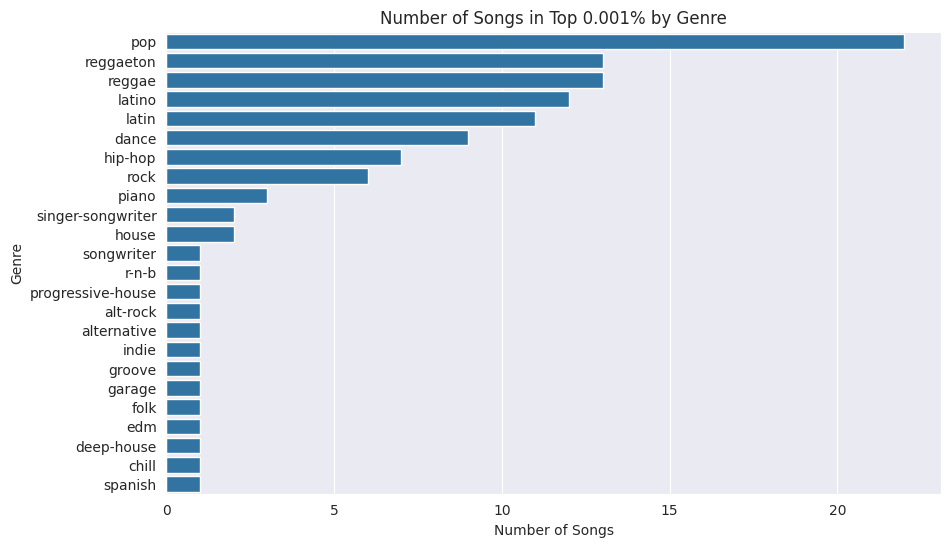

In [57]:
def showTheTopSongs(df: pd.DataFrame, top_perc: float ):
    df_sorted: pd.DataFrame = df.sort_values(popularity_str, ascending=False)

    top_10_percent: pd.DataFrame = df_sorted.head(int(top_perc * len(df_sorted)))
    
    gropuped_genres: pd.DataFrame = top_10_percent.groupby(track_genre_str).size().reset_index(name="count")
    gropuped_genres = gropuped_genres.sort_values(by='count', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='track_genre', data=gropuped_genres)
    plt.title('Number of Songs in Top 0.001% by Genre')
    plt.xlabel('Number of Songs')
    plt.ylabel('Genre')
    plt.show()
    return gropuped_genres, top_10_percent

_, df_top = showTheTopSongs(df, 0.001)

In [59]:
sortFilterAndPrintTheirAvgProps(df_top, "pop", 50, 90)

Avg Danceability 0.5272000000000001
Avg Popularity 89.6
Avg Instrumentalness 0.000332075
Avg Acousticness 0.2932
Avg Speechiness 0.06143
Avg Valence 0.30259
Avg Energy 0.6161000000000001
Avg Liveness 0.17848


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81004,7MXVkk9YMctZqd1Srtv4MB,The Weeknd;Daft Punk,Starboy,Starboy,90,230453,True,0.679,0.587,7,-7.015,1,0.2760,0.1410,0.000006,0.1370,0.4860,186.003,4,pop
81015,2eAvDnpXP5W0cVtiI0PUxV,Ruth B.,Safe Haven,Dandelions,90,233720,False,0.609,0.692,1,-2.958,1,0.0259,0.0157,0.000000,0.0864,0.4540,116.959,3,pop
81012,58HvfVOeJY7lUuCqF0m3ly,Elley Duhé,MIDDLE OF THE NIGHT,MIDDLE OF THE NIGHT,90,184447,False,0.410,0.611,4,-8.271,0,0.0467,0.0228,0.000000,0.1160,0.0899,185.727,3,pop
81101,1cKHdTo9u0ZymJdPGSh6nq,The Weeknd;Gesaffelstein,"My Dear Melancholy,",I Was Never There,90,241066,False,0.323,0.737,10,-4.008,1,0.0338,0.1420,0.000162,0.1630,0.1550,113.260,4,pop
81050,0T5iIrXA4p5GsubkhuBIKV,Stephen Sanchez,Until I Found You,Until I Found You,90,177720,False,0.539,0.508,10,-6.050,1,0.0288,0.7270,0.000000,0.1740,0.2270,101.358,3,pop
81803,75FEaRjZTKLhTrFGsfMUXR,Kate Bush,Hounds Of Love,Running Up That Hill (A Deal With God),90,298933,False,0.629,0.547,10,-13.123,0,0.0550,0.7200,0.003140,0.0604,0.1970,108.375,4,pop
81053,0u2P5u6lvoDfwTYjAADbn4,Billie Eilish;Khalid,lovely (with Khalid),lovely (with Khalid),89,200185,False,0.351,0.296,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.1200,115.284,4,pop
81200,5QO79kh1waicV47BqGRL3g,The Weeknd,After Hours,Save Your Tears,89,215626,True,0.680,0.826,0,-5.487,1,0.0309,0.0212,0.000012,0.5430,0.6440,118.051,4,pop
81150,09mEdoA6zrmBPgTEN5qXmN,The Weeknd,"My Dear Melancholy,",Call Out My Name,89,228373,False,0.461,0.593,1,-4.954,1,0.0356,0.1700,0.000000,0.3070,0.1750,134.170,3,pop
81054,5HCyWlXZPP0y6Gqq8TgA20,The Kid LAROI;Justin Bieber,STAY (with Justin Bieber),STAY (with Justin Bieber),89,141805,True,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,0.4780,169.928,4,pop


From the average of `valence` <= 0.30 shows that these songs tends to show negativity, based on our research on their lyrics, we observed this was used due to deliver the contents of the songs. This could indicate that the listener of popular pop genre prefer to listen to its lyrics and meaning, but seems its more into how these pop songs were delivered. Meaning not only the lyrics but also the instrumental and the pitch. All of these songs emphasize the lyrics rather their instrumental. Unfortunately, we don't have the songs signal analysis tools to dive into these aspect 

Now we have explored a lot from the genre perspective, but we haven't touched a lot from the `danceability` and `energy` plot perspective among the popularity genre. This result will answer why higher danceability on `chill`, and `sad`, or another genres that have the same similarities.

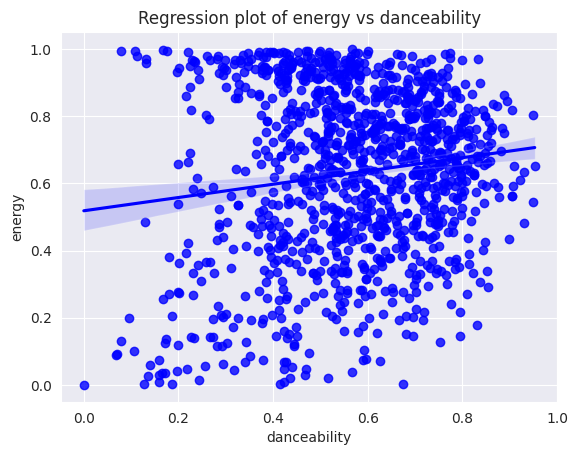

In [67]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, x=danceability_str, y=energy_str, color="b")
plt.title("Regression plot of energy vs danceability")
plt.show()

There is no tight linear correlation between these variables, that also explains why some song have a high danceability but low energy, because both of these variables measures different units. And that support why certain genre have high danceability, but low energy. Its because the higher the danceability, most likely the listener will gerakin their body even the simpler one , like tapping your table, or nodding your head.

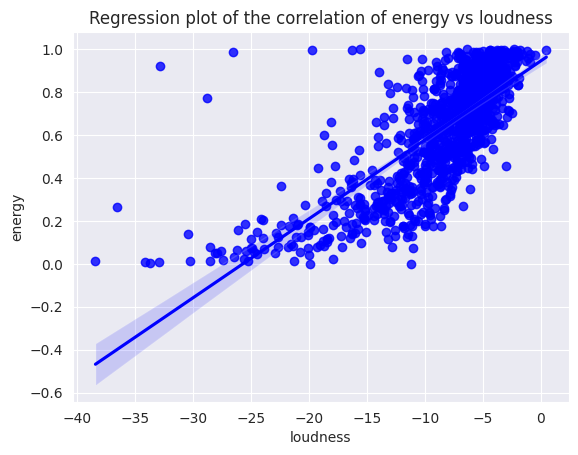

In [62]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, y=energy_str, x=loudness_str, color="b")
plt.title("Regression plot of the correlation of energy vs loudness")
plt.show()

This also make sense because the loud the songs are, the energy of the songs output might also high, just like rock genre. The loudness below 25 / outlier indicate the songs were meant to sleep or ambience like rain, or sound of whitenoise 

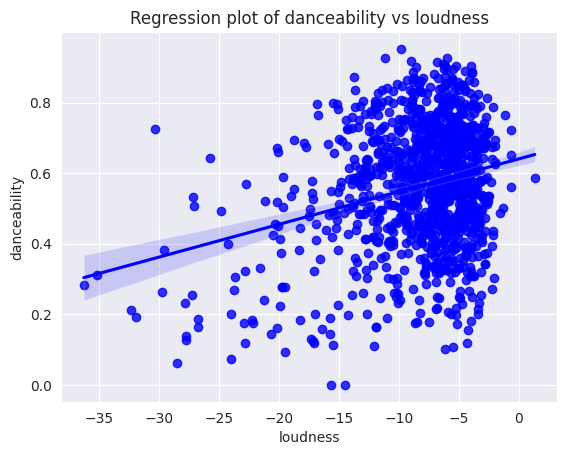

In [69]:
sample = df.sample(int(0.01 * len(df)))
sns.regplot(data=sample, x=loudness_str, y=danceability_str, color="b")
plt.title("Regression plot of danceability vs loudness")
plt.show()

Most like the songs normally created between -10 to -5 despite their genre, and we're able to see that the danceability of these songs over centralize between 0.4 to 0.8 , indicate most of the songs will make the listener gerakin badannya even sedikit.

## Conclusion for 
- What's the most popular track_genre ? How's their audio properties ? What are their purpose 
- Based on 10% most popular songs, how's the track genre And also how's their audio properties ?
- Is Audio Properties helped the music getting popular ? Yep, but it rely on the track_genre and their purpose to audience too, for example the pop track_genre from top 10% songs, emphasize the lyrics and the songs atmoshpehre too from the background noise and the instrumental they were using. Same as the top most average genre like pop-film, it were made for film especially indian movies. And based

### Answering the Question 5
- Should artists pick personal or trending genres to gain popularity ? 
- Should artists stays to their original genres or expands ?

##### Answering should artist pick genres or trending ?

In [89]:
top_genres: pd.DataFrame = df.groupby(track_genre_str)[popularity_str].mean()
top_genres = top_genres[top_genres >= 30].sort_values(ascending=False)

df_copy: pd.DataFrame = df.copy()
df_copy[artists_str] = df_copy[artists_str].str.split(';')
df_copy = df_copy.explode(artists_str)

top_artists: pd.DataFrame = df_copy.groupby(artists_str)[popularity_str].mean()
top_artists = top_artists[top_artists >= 70].sort_values(ascending=False)

top_genres_from_top_artist: List[str] = top_artists.index.tolist()
top_genres_f_tp = df[df[artists_str].isin(top_genres_from_top_artist)][track_genre_str].unique().tolist()
top_genres_f_tp

['alt-rock',
 'alternative',
 'blues',
 'british',
 'cantopop',
 'chill',
 'country',
 'dance',
 'disco',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'french',
 'funk',
 'garage',
 'german',
 'grunge',
 'hard-rock',
 'hardcore',
 'hip-hop',
 'house',
 'indie-pop',
 'indie',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'latin',
 'latino',
 'metal',
 'piano',
 'pop',
 'progressive-house',
 'psych-rock',
 'punk-rock',
 'punk',
 'r-n-b',
 'reggae',
 'reggaeton',
 'rock',
 'sad',
 'singer-songwriter',
 'ska',
 'sleep',
 'songwriter',
 'soul',
 'spanish',
 'swedish',
 'techno',
 'turkish']

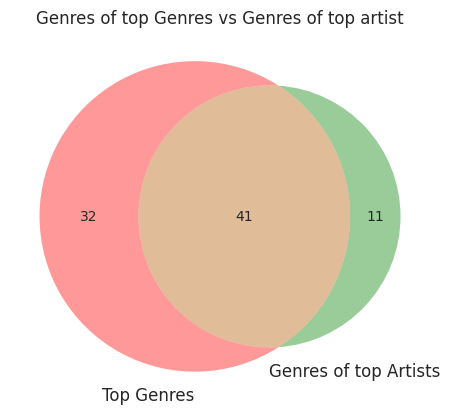

In [92]:
from matplotlib_venn import venn2

venn2([set(top_genres.index.tolist()), set(top_genres_f_tp)], set_labels=("Top Genres", "Genres of top Artists"))
plt.title("Genres of top Genres vs Genres of top artist")
plt.show()

In [94]:
[(genre) for genre in top_genres_f_tp if genre not in top_genres]

['alternative',
 'country',
 'dance',
 'german',
 'jazz',
 'latin',
 'latino',
 'reggae',
 'reggaeton',
 'rock',
 'soul']

In [95]:
sortFilterAndPrintTheirAvgProps(df, "alternative")

Avg Danceability 0.555202380952381
Avg Popularity 76.1547619047619
Avg Instrumentalness 0.053705656785714276
Avg Acousticness 0.11334086607142858
Avg Speechiness 0.056505952380952386
Avg Valence 0.46368869047619043
Avg Energy 0.7311607142857143
Avg Liveness 0.18651785714285715


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
3003,2QjOHCTQ1Jl3zawyYOpxh6,The Neighbourhood,I Love You.,Sweater Weather,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,4,alternative
3000,5E30LdtzQTGqRvNd7l6kG5,The Neighbourhood,Wiped Out!,Daddy Issues,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,4,alternative
3300,73vIOb4Q7YN6HeJTbscRx5,Oliver Tree;Robin Schulz,Miss You,Miss You,87,206000,True,0.587,0.742,6,-6.640,0,0.0529,0.01280,0.001070,0.1460,0.199,145.007,4,alternative
3002,2K7xn816oNHJZ0aVqdQsha,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Softcore,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.04840,0.000417,0.2860,0.370,93.986,4,alternative
3004,4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,abcdefu,86,168601,True,0.695,0.540,4,-5.692,1,0.0493,0.29900,0.000000,0.3670,0.415,121.932,4,alternative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3703,6XcfKZvJio9Z0fQy11GnNX,lovelytheband,finding it hard to smile,broken,70,204878,False,0.666,0.728,7,-5.808,1,0.0419,0.00175,0.000004,0.0429,0.510,122.996,4,alternative
3010,6bTbMMEShyGyrcuIwtBlpA,Bella Poarch,Dolls EP,Living Hell,70,174002,False,0.729,0.551,0,-6.935,0,0.0560,0.59800,0.000000,0.1760,0.312,124.044,4,alternative
3765,2Kt1XplPBQBsDKQDa6TssB,The Neighbourhood,I Love You.,Flawless,70,246493,True,0.568,0.871,0,-3.453,1,0.0308,0.05530,0.510000,0.3030,0.374,119.990,4,alternative
3855,113xf7t4qNM7038YJvauik,The Neighbourhood,Hard To Imagine The Neighbourhood Ever Changing,Nervous,70,245000,False,0.589,0.614,0,-7.528,0,0.0426,0.02130,0.165000,0.3100,0.318,119.837,4,alternative


In [97]:
sortFilterAndPrintTheirAvgProps(df, "country")

Avg Danceability 0.5667816091954024
Avg Popularity 75.1264367816092
Avg Instrumentalness 0.012855358965517243
Avg Acousticness 0.2998549425287356
Avg Speechiness 0.04088390804597702
Avg Valence 0.5575172413793104
Avg Energy 0.6117241379310345
Avg Liveness 0.16393908045977013


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19350,3WMj8moIAXJhHsyLaqIIHI,Zach Bryan,Something in the Orange,Something in the Orange,89,228013,False,0.369,0.192,4,-12.151,0,0.0400,0.55500,0.000008,0.0954,0.148,175.212,3,country
19652,5uU1uuyaUIBOiiUSQG7Wl3,Morgan Wallen,You Proof,You Proof,86,157477,False,0.731,0.850,9,-4.913,1,0.0336,0.25200,0.000000,0.6050,0.644,119.706,4,country
19200,2LawezPeJhN4AWuSB0GtAU,Creedence Clearwater Revival,Pendulum (Expanded Edition),Have You Ever Seen The Rain,84,160133,False,0.741,0.697,0,-7.028,1,0.0277,0.06640,0.000023,0.1330,0.774,116.109,4,country
19100,40riOy7x9W7GXjyGp4pjAv,Eagles,Hotel California (2013 Remaster),Hotel California - 2013 Remaster,84,391376,False,0.579,0.508,2,-9.484,1,0.0270,0.00574,0.000494,0.0575,0.609,147.125,4,country
19853,4686eQ81DEswHa90bcdlC9,Bailey Zimmerman,Rock and A Hard Place,Rock and A Hard Place,84,207540,False,0.582,0.568,1,-7.300,1,0.0275,0.57700,0.000000,0.1050,0.394,121.991,3,country
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19920,5fdhThPDe6jQQDqCyWrdAn,Dolly Parton,Jolene (Expanded Edition),Jolene,70,161533,False,0.674,0.537,1,-10.971,0,0.0363,0.56600,0.000000,0.1310,0.809,110.578,4,country
19659,79qxwHypONUt3AFq0WPpT9,Kacey Musgraves,Golden Hour,Rainbow,70,214293,False,0.581,0.197,3,-7.697,1,0.0329,0.88000,0.000000,0.1070,0.349,130.367,4,country
19657,7vF3xkCMvZjAe2nTWY0uQZ,Jake Owen,Greetings From...Jake,Made For You,70,238400,False,0.581,0.441,1,-6.829,1,0.0268,0.77000,0.000028,0.1110,0.337,82.125,4,country
19500,4WZ3liyYz5ZzDcL4ibAuOi,Kane Brown,Grand,Grand,70,178973,False,0.583,0.856,6,-5.446,0,0.0445,0.00484,0.000000,0.2240,0.480,168.053,4,country


In [98]:
sortFilterAndPrintTheirAvgProps(df, "dance")

Avg Danceability 0.682389344262295
Avg Popularity 78.88524590163935
Avg Instrumentalness 0.002284286352459016
Avg Acousticness 0.16094537704918035
Avg Speechiness 0.08156188524590163
Avg Valence 0.5305831967213116
Avg Energy 0.6840204918032786
Avg Liveness 0.1539200819672131


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
20000,5IgjP7X4th6nMNDh4akUHb,Chris Brown,Indigo (Extended),Under The Influence,96,184613,True,0.733,0.690,9,-5.529,0,0.0427,0.06350,0.000001,0.1050,0.310,116.992,4,dance
20850,1xzi1Jcr7mEi9K2RfzLOqS,Beyoncé,RENAISSANCE,CUFF IT,93,225388,True,0.780,0.689,7,-5.668,1,0.1410,0.03680,0.000010,0.0698,0.642,115.042,4,dance
20017,0mBP9X2gPCuapvpZ7TGDk3,Charlie Puth;Jung Kook;BTS,Left and Right (Feat. Jung Kook of BTS),Left and Right (Feat. Jung Kook of BTS),92,154486,False,0.881,0.592,2,-4.898,1,0.0324,0.61900,0.000013,0.0901,0.719,101.058,4,dance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20863,3fGW43fnu3OHEw6ohTC2Bw,Anne-Marie;Niall Horan,Therapy,Our Song,71,163733,False,0.572,0.759,2,-4.312,1,0.0506,0.12700,0.000000,0.2240,0.519,80.950,4,dance
20754,6l0Ky2PycJV1Bz88kFeVGL,Hailee Steinfeld;BloodPop®,Fifty Shades Freed (Original Motion Picture So...,Capital Letters,70,219373,False,0.661,0.814,0,-5.529,1,0.0759,0.03370,0.000008,0.0518,0.459,99.963,4,dance
20714,4jp4Z02kzzg8gK0NmDGgml,K-391;Alan Walker;Tungevaag;Mangoo,Play,Play,70,167976,False,0.520,0.798,6,-5.498,0,0.0391,0.10100,0.000000,0.0932,0.168,101.944,4,dance
20960,33KJ2xFYONOlIYDBg6wPx8,HRVY,Talk To Ya - EP,Personal,70,198040,False,0.755,0.536,8,-5.605,1,0.1200,0.11400,0.000000,0.0282,0.882,138.969,4,dance



Notice that despite 11 out of 52 genres were prefered by the artists itself, meaning these artists probably have uniqueness in their genres with a distinctive personal touch. For examples, songs from the neigbourhood, they have a different touch with how they express the lyrics to the listener. Near every alternative songs have a different approach, based on the artists preferences. But notice that the `alternative` genre also has `valence` below  50 meaning a lot of negative words, based on our observation from the neighboorhood songs, there are a lot of negative words were used but again how they delivered the lyrics is differs from other genres. The `Dance` genre on the other hand, based on our observation it does not really meant for dancing, some songs they do add some drop remix but their empashize also depends on the artists itself.

Text(0, 0.5, '')

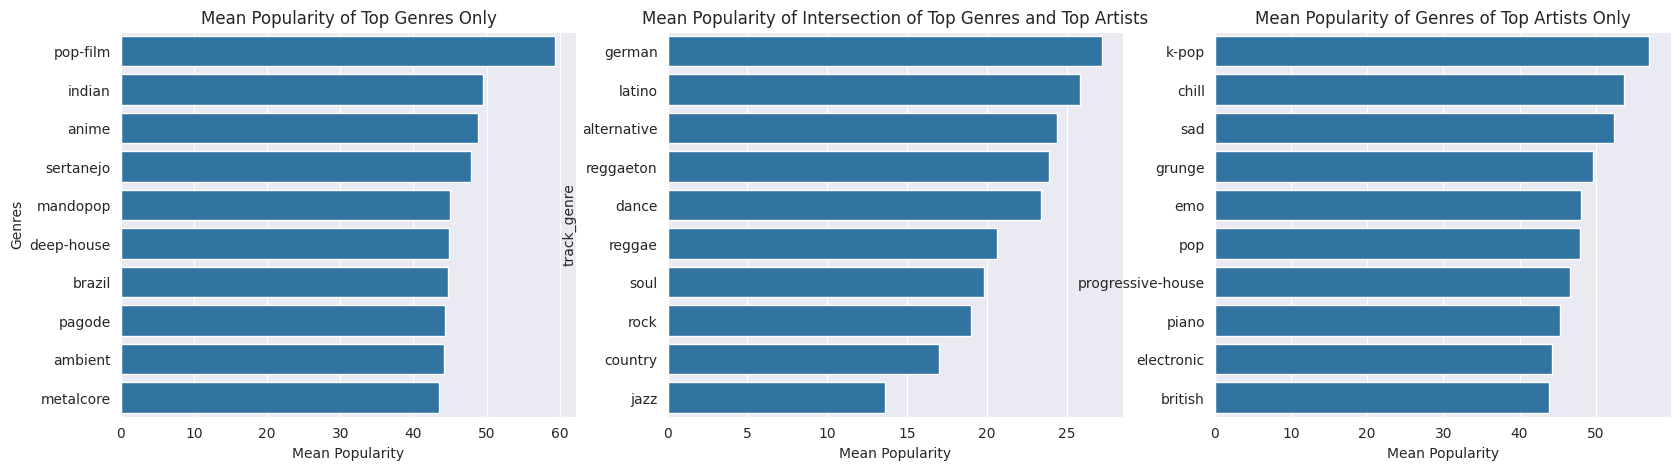

In [114]:
top_genres_only = list(set(top_genres.index.tolist()) - set(top_genres_f_tp))
genres_artists_only = list(set(top_genres_f_tp) - set(top_genres.index.tolist()))
intersect =  list(set(top_genres.index.to_list()) & set(top_genres_f_tp))

df_top_genre_only = df[df[track_genre_str].isin(top_genres_only)].groupby(track_genre_str)[popularity_str].mean().sort_values(ascending=False)[:10]
df_top_genres_artists_only = df[df[track_genre_str].isin(genres_artists_only)].groupby(track_genre_str)[popularity_str].mean().sort_values(ascending=False)[:10]
df_intersec_top = df[df[track_genre_str].isin(intersect)].groupby(track_genre_str)[popularity_str].mean().sort_values(ascending=False)[:10]


fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x=df_top_genre_only.values, y=df_top_genre_only.index, ax=axes[0])
axes[0].set_title('Mean Popularity of Top Genres Only')
axes[0].set_xlabel('Mean Popularity')
axes[0].set_ylabel('Genres')

sns.barplot(x=df_intersec_top.values, y=df_intersec_top.index, ax=axes[2])
axes[1].set_title('Mean Popularity of Intersection of Top Genres and Top Artists')
axes[1].set_xlabel('Mean Popularity')
axes[1].set_ylabel('')

sns.barplot(x=df_top_genres_artists_only.values, y=df_top_genres_artists_only.index, ax=axes[1])
axes[2].set_title('Mean Popularity of Genres of Top Artists Only')
axes[2].set_xlabel('Mean Popularity')
axes[2].set_ylabel('')



In [115]:
sortFilterAndPrintTheirAvgProps(df, "german")

Avg Danceability 0.63665
Avg Popularity 74.825
Avg Instrumentalness 0.0541944255
Avg Acousticness 0.204686635
Avg Speechiness 0.09261000000000001
Avg Valence 0.494865
Avg Energy 0.676745
Avg Liveness 0.180985


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
39408,7nFJSfGvvV0WjatTZN6QYi,Luciano;Aitch;BIA,Bamba (feat. Aitch & BIA),Bamba (feat. Aitch & BIA),84,203255,False,0.798,0.8060,10,-5.841,1,0.3550,0.145000,0.000000,0.1300,0.8200,138.082,4,german
39158,34xGLuxM0rkxhCVyMSqwJO,Milky Chance,Sadnecessary,Stolen Dance,80,313684,False,0.884,0.5810,11,-8.813,1,0.0378,0.427000,0.000206,0.0759,0.7280,114.016,4,german
39001,09IStsImFySgyp0pIQdqAc,Zedd;Maren Morris;Grey,The Middle,The Middle,80,184732,False,0.753,0.6570,7,-3.061,1,0.0449,0.171000,0.000000,0.1120,0.4370,107.010,4,german
39359,3kcKlOkQQEPVwxwljbGJ5p,Topic;A7S,Kernkraft 400 (A Better Day),Kernkraft 400 (A Better Day),80,165800,False,0.623,0.7270,11,-5.570,0,0.0562,0.184000,0.000020,0.3090,0.4000,125.975,4,german
39156,5YaskwnGDZFDRipaqzbwQx,ATB;Topic;A7S,Your Love (9PM),Your Love (9PM),79,150052,False,0.669,0.7840,7,-5.603,1,0.1120,0.194000,0.000006,0.1150,0.5170,125.993,4,german
39165,3ovjw5HZZv43SxTwApooCM,Scorpions,Crazy World,Wind Of Change,79,312360,False,0.452,0.5240,0,-10.108,1,0.0351,0.315000,0.000000,0.1030,0.2460,151.505,4,german
39150,0oA9wBGDY4uyILLg4GymWP,AnnenMayKantereit;Giant Rooks,Tom's Diner,Tom's Diner,78,269333,False,0.680,0.4280,6,-8.107,0,0.1350,0.376000,0.000344,0.3550,0.3340,98.222,4,german
39153,3H7ihDc1dqLriiWXwsc2po,Topic;A7S,Breaking Me,Breaking Me,78,166793,False,0.789,0.7200,8,-5.652,0,0.2180,0.223000,0.000000,0.1290,0.6640,122.031,4,german
39758,2XRn6Qu0Wd1KvOND8JbaTx,Luciano,Beautiful Girl,Beautiful Girl,78,179186,False,0.839,0.4120,11,-8.816,0,0.0935,0.287000,0.000796,0.1010,0.6070,139.901,4,german
39163,5YdnOm5990Kfq1Jodws98B,Felix Jaehn;Ray Dalton,Call It Love,Call It Love,77,154560,False,0.616,0.8410,5,-4.779,0,0.0760,0.055900,0.002170,0.4170,0.7140,110.029,4,german


Interestingly, these german genre does not mean the songs were using german languages, maybe some part of the songs used german specific tools / style. Although the intersection were important, but the top artists genre shows that rather than following the trends of genre, making a genre that is unique is 

We employed the [] framework to explore the optimal learning rate. Our experiments demonstrated that the vanilla model’s average accuracy was insufficient, indicating its limitations in classifying smokers and non-smokers. Even though the integration of pre-trained models improved the average accuracy by 10, it remained below 80, suggesting that these models face challenges in accurately classifying smokers and non-smokers. Upon analyzing the prediction results, we found that the CNN models, including AlexNet, VGG16, and ResNet34, struggled with classifying small objects. This is because these architectures do not effectively quantify smaller objects, leading them to focus on learning general information from the input rather than the finer details.